In [1]:
!pip install gurobipy yfinance
!pip install cvxpy
!pip install pulp

import pandas as pd
import numpy as np
import yfinance as yf
from cvxpy import *
import seaborn as sns
import matplotlib.pyplot as plt
from pulp import *

     |████████████████████████████████| 11.5 MB 10.7 MB/s 
     |████████████████████████████████| 6.3 MB 44.7 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 41.2 MB 1.3 MB/s 


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import requests 
from bs4 import BeautifulSoup 

In [4]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

## DATA COLLECTION

In [5]:
wikiurl="https://en.wikipedia.org/wiki/List_of_S%26P_600_companies"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)

soup = BeautifulSoup(response.text, 'html.parser')
small_cap=soup.find('table',{'class':"wikitable"})

In [6]:
df = pd.read_html(str(small_cap))
df = pd.DataFrame(df[0])
df.head()

,Company,Ticker symbol,GICS Sector,GICS Sub-Industry,SEC filings,CIK
0,The Aaron's Company,AAN,Consumer Discretionary,Homefurnishing Retail,view,1821393
1,"AAON, Inc.",AAON,Industrials,Building Products,view,824142
2,American Assets Trust,AAT,Real Estate,Diversified REITs,view,1500217
3,Atlas Air Worldwide Holdings,AAWW,Industrials,Air Freight & Logistics,view,1135185
4,Ameris Bancorp,ABCB,Financials,Regional Banks,view,351569


In [7]:
df = df[['Ticker symbol', 'GICS Sector']]

In [8]:
df['GICS Sector'].value_counts()

Financials                106
Consumer Discretionary     91
Industrials                88
Health Care                81
Information Technology     63
Real Estate                55
Materials                  39
Energy                     32
Consumer Staples           28
Communication Services     10
Utilities                   8
Name: GICS Sector, dtype: int64

In [9]:
finance_small = list(df['Ticker symbol'][df['GICS Sector'] == 'Financials'])
healthcare_small = list(df['Ticker symbol'][df['GICS Sector'] == 'Health Care'])
technology_small = list(df['Ticker symbol'][df['GICS Sector'] == 'Information Technology'])
real_estate_small = list(df['Ticker symbol'][df['GICS Sector'] == 'Real Estate'])
industrial_small = list(df['Ticker symbol'][df['GICS Sector'] == 'Industrials'])

small = finance_small + healthcare_small + technology_small + real_estate_small + industrial_small

In [10]:
small_cap = yf.download(small, end = '2021-06-01', start = '2019-01-01', interval='3mo')

[*********************100%***********************]  393 of 393 completed

4 Failed downloads:
- FBRT: Data doesn't exist for startDate = 1546300800, endDate = 1622505600
- ONL: Data doesn't exist for startDate = 1546300800, endDate = 1622505600
- MOG.A: No data found, symbol may be delisted
- CCSI: Data doesn't exist for startDate = 1546300800, endDate = 1622505600


In [11]:
small_cap = small_cap.Close
small_drop = list(small_cap.iloc[1,:][small_cap.iloc[1,:].isnull()].index)
small_cap.drop(small_drop, axis = 1, inplace = True)

In [12]:
small = small_cap.columns

In [13]:
for stock in finance_small:
  if stock not in small:
    finance_small.remove(stock)

for stock in healthcare_small:
  if stock not in small:
    healthcare_small.remove(stock)

for stock in technology_small:
  if stock not in small:
    technology_small.remove(stock)

for stock in real_estate_small:
  if stock not in small:
    real_estate_small.remove(stock)
    
for stock in industrial_small:
  if stock not in small:
    industrial_small.remove(stock)

In [14]:
small_cap.dropna(axis = 0, inplace = True)

In [15]:
wikiurl="https://en.wikipedia.org/wiki/List_of_S%26P_400_companies"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)

soup = BeautifulSoup(response.text, 'html.parser')
mid_cap=soup.find('table',{'class':"wikitable"})

In [16]:
df = pd.read_html(str(mid_cap))
df = pd.DataFrame(df[0])
df.head()

,Security,Ticker symbol,GICS Sector,GICS Sub-Industry,SEC filings
0,American Campus Communities,ACC,Real Estate,Residential REITs,reports
1,Acadia Healthcare,ACHC,Health Care,Health Care Facilities,reports
2,ACI Worldwide,ACIW,Information Technology,Application Software,reports
3,AECOM,ACM,Industrials,Construction & Engineering,reports
4,Alliance Data Systems,ADS,Information Technology,Data Processing & Outsourced Services,reports


In [17]:
finance_mid = list(df['Ticker symbol'][df['GICS Sector'] == 'Financials'])
healthcare_mid = list(df['Ticker symbol'][df['GICS Sector'] == 'Health Care'])
technology_mid = list(df['Ticker symbol'][df['GICS Sector'] == 'Information Technology'])
real_estate_mid = list(df['Ticker symbol'][df['GICS Sector'] == 'Real Estate'])
industrial_mid = list(df['Ticker symbol'][df['GICS Sector'] == 'Industrials'])

mid = finance_mid + healthcare_mid + technology_mid + real_estate_mid + industrial_mid

In [18]:
mid_cap = yf.download(mid, end = '2021-06-01', start = '2019-01-01', interval='3mo')

[*********************100%***********************]  261 of 261 completed

2 Failed downloads:
- GXO: Data doesn't exist for startDate = 1546300800, endDate = 1622505600
- KD: Data doesn't exist for startDate = 1546300800, endDate = 1622505600


In [19]:
mid_cap = mid_cap.Close
mid_drop = list(mid_cap.iloc[1,:][mid_cap.iloc[1,:].isnull()].index)
mid_cap.drop(mid_drop, axis = 1, inplace = True)

In [20]:
mid_cap.dropna(axis = 0, inplace = True)

In [21]:
mid = mid_cap.columns

In [22]:
for stock in finance_mid:
  if stock not in mid:
    finance_mid.remove(stock)

for stock in healthcare_mid:
  if stock not in mid:
    healthcare_mid.remove(stock)

for stock in technology_mid:
  if stock not in mid:
    technology_mid.remove(stock)

for stock in real_estate_mid:
  if stock not in mid:
    real_estate_mid.remove(stock)
    
for stock in industrial_mid:
  if stock not in mid:
    industrial_mid.remove(stock)

In [23]:
wikiurl="https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)

soup = BeautifulSoup(response.text, 'html.parser')
large_cap=soup.find('table',{'class':"wikitable"})

In [24]:
df = pd.read_html(str(large_cap))
df = pd.DataFrame(df[0])
df.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [25]:
finance_large = list(df['Symbol'][df['GICS Sector'] == 'Financials'])
healthcare_large = list(df['Symbol'][df['GICS Sector'] == 'Health Care'])
technology_large = list(df['Symbol'][df['GICS Sector'] == 'Information Technology'])
real_estate_large = list(df['Symbol'][df['GICS Sector'] == 'Real Estate'])
industrial_large = list(df['Symbol'][df['GICS Sector'] == 'Industrials'])

large = finance_large + healthcare_large + technology_large + real_estate_large + industrial_large

In [26]:
large_cap = yf.download(large, end = '2021-06-01', start = '2019-01-01', interval='3mo')

[*********************100%***********************]  306 of 306 completed

1 Failed download:
- BRK.B: No data found, symbol may be delisted


In [27]:
large_cap = large_cap.Close

In [28]:
large_drop = list(large_cap.iloc[1,:][large_cap.iloc[1,:].isnull()].index)
large_cap.drop(large_drop, axis = 1, inplace = True)
large_cap.dropna(axis = 0, inplace = True)

In [29]:
large = large_cap.columns

In [30]:
for stock in finance_large:
  if stock not in large:
    finance_large.remove(stock)

for stock in healthcare_large:
  if stock not in large:
    healthcare_large.remove(stock)

for stock in technology_large:
  if stock not in large:
    technology_large.remove(stock)

for stock in real_estate_large:
  if stock not in large:
    real_estate_large.remove(stock)
    
for stock in industrial_large:
  if stock not in large:
    industrial_large.remove(stock)

In [31]:
stocks = pd.concat([small_cap, mid_cap, large_cap], axis = 1)
stocks.shape

(10, 937)

In [32]:
finance = finance_small + finance_mid + finance_large
healthcare = healthcare_small + healthcare_mid + healthcare_large
technology = technology_small + technology_mid + technology_large 
real_estate = real_estate_small + real_estate_mid + real_estate_small
industrial = industrial_small + industrial_mid + industrial_large

In [33]:
len(finance)

232

In [34]:
len(healthcare)

177

In [35]:
len(technology)

184

In [36]:
len(real_estate)

142

In [37]:
len(industrial)

226

## CALCULATING RETURNS

In [38]:
stocks_return = pd.DataFrame()
for i in stocks.columns:
  stocks_return[i] = np.divide(np.diff(stocks[i]),stocks[i][:-1] )

In [39]:
expected_return = stocks_return.mean(axis = 0)

In [40]:
cov = stocks_return.cov()

In [41]:
n_assets = 10
n_portfolios = 1000
mean_variance_pairs = []

np.random.seed(75)

for i in range(n_portfolios):
    assets = list(np.random.choice(list(stocks.columns), n_assets, replace=False))
    weights = list(np.random.rand(n_assets))
    w = []
    for i in weights:
      w.append(i/sum(weights))
    portfolio_E_Variance = 0
    portfolio_E_Return = 0
    for i in range(len(assets)):
        portfolio_E_Return += w[i] * expected_return.loc[assets[i]]
        for j in range(len(assets)):
            portfolio_E_Variance += w[i] * w[j] * cov.loc[assets[i], assets[j]]
            
    mean_variance_pairs.append([portfolio_E_Return, portfolio_E_Variance])

In [42]:
import plotly.graph_objects as go

In [43]:
mean_variance_pairs = np.array(mean_variance_pairs)
risk_free_rate=0 
fig = go.Figure()
fig.add_trace(go.Scatter(x=mean_variance_pairs[:,1]**0.5, 
                         y=mean_variance_pairs[:,0],   
                      marker=dict(color=(mean_variance_pairs[:,0]-risk_free_rate)/(mean_variance_pairs[:,1]**0.5), 
                                  showscale=True, 
                                  size=7,
                                  line=dict(width=1),
                                  colorscale="RdBu",
                                  colorbar=dict(title="Sharpe<br>Ratio")
                                 ), 
                      mode='markers'))

fig.update_layout(template='plotly_white',
                  xaxis=dict(title='Quarterly Risk (Volatility)'),
                  yaxis=dict(title='Quarterly Return'),
                  title='Sample of Random Portfolios',
                  coloraxis_colorbar=dict(title="Sharpe Ratio"))

## MARKOWITZ OPTIMIZATION 

In [44]:
return_data = stocks_return.T

In [45]:
r = np.asarray(np.mean(return_data, axis=1))
C = np.asmatrix(np.cov(return_data))

In [46]:
symbols = stocks_return.columns

# Number of variables
n = len(symbols)

# The variables vector
x = Variable(n)

# The minimum return
req_return = 0.03

# The return
ret = r.T*x

# The risk in xT.Q.x format
risk = quad_form(x, C)

# The core problem definition with the Problem class from CVXPY
prob = Problem(Minimize(risk), [sum(x)==1, ret >= req_return, x>=0, x<=0.75])

In [47]:
%%time
prob.solve()
print ("Exp ret = {}%".format(round(100*ret.value,2)))
print ("Expected risk    = {}%".format(100*risk.value**0.1))

Exp ret = 5.55%
Expected risk    = 3.397849088725085%
CPU times: user 887 ms, sys: 251 ms, total: 1.14 s
Wall time: 902 ms


In [48]:
c = 0
for s in range(len(symbols)):
  if x.value[s]>0.000001:
    c+=1
    print(symbols[s], ' = ', round(x.value[s],6))

AAON  =  9.3e-05
AAT  =  1.6e-05
AAWW  =  0.000136
ABCB  =  0.000153
ABM  =  8.2e-05
ABTX  =  7.3e-05
ACA  =  0.000116
ACLS  =  0.000174
ADC  =  0.005689
ADTN  =  0.000123
ADUS  =  0.000183
AEIS  =  0.000141
AEL  =  0.000127
AGO  =  0.000158
AGYS  =  0.000213
AHH  =  3e-06
AIN  =  0.000321
AIR  =  0.000244
AIT  =  4.8e-05
AJRD  =  0.000651
AKR  =  0.000343
ALEX  =  0.000292
ALG  =  9.3e-05
ALGT  =  0.000292
ALRM  =  0.000129
AMBC  =  0.000132
AMEH  =  0.000156
AMN  =  0.009696
AMPH  =  4.4e-05
AMSF  =  0.014415
AMWD  =  0.000292
ANGO  =  0.000168
ANIK  =  0.000124
ANIP  =  0.000235
APOG  =  8.9e-05
ARCB  =  0.000374
ARI  =  0.000136
ARLO  =  0.000415
ARR  =  0.000113
ASTE  =  0.0002
AVAV  =  6.5e-05
AVNS  =  4.4e-05
AX  =  0.000184
AZZ  =  4.5e-05
B  =  6.2e-05
BANC  =  0.000226
BANF  =  0.00016
BANR  =  0.000115
BCC  =  0.000145
BCOR  =  9.7e-05
BDN  =  6e-06
BFS  =  0.000229
BHE  =  0.000124
BHLB  =  7.3e-05
BKU  =  0.00016
BLFS  =  0.000408
BMI  =  9.2e-05
BRC  =  5.5e-05
BRKL  =  1

In [49]:
c

937

## MAXIMIN OPTIMIZATION WITHOUT DIVERSIFICATION CONSTRAINTS

In [50]:
x = stocks_return.columns

In [51]:
prob = LpProblem("Maximin_optimization", LpMaximize)

In [52]:
x=LpVariable.dicts("Proportion",x, 0, cat='Continuous')
z=LpVariable("Minimum_Return")
prob += z, 'Minimum Return'
for i in range(stocks_return.shape[0]):
  t = dict(zip(x, stocks_return.iloc[i,:]))
  prob += lpSum([t[i] * x[i] for i in stocks_return.columns])-z>=0
prob += lpSum(x) == 1
prob += lpSum([expected_return[i] * x[i] for i in stocks_return.columns]) >=0.03

In [53]:
%%time
prob.solve()

CPU times: user 88 ms, sys: 15.1 ms, total: 103 ms
Wall time: 111 ms


1

In [54]:
print("Status:", LpStatus[prob.status])

Status: Optimal


In [55]:
for i in prob.variables():
  if i.varValue!=0:
    print(i.name, " = ", i.varValue)

Minimum_Return  =  0.21942421
Proportion_ARWR  =  0.19717994
Proportion_JYNT  =  0.14169937
Proportion_MRNA  =  0.23074024
Proportion_OMI  =  0.20937859
Proportion_ZYXI  =  0.22100186


In [56]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#E6E6FA']

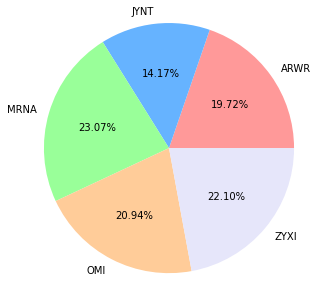

In [57]:
labels = []
sizes = []
for i in prob.variables()[1:]:
  if i.varValue!=0:
    labels.append(i.name.split('_')[1])
    sizes.append(i.varValue)
plt.figure(figsize = [5,5])
plt.pie(sizes, labels=labels,  autopct='%1.2f%%', colors = colors)
plt.axis('equal')
plt.show()

In [58]:
optimal_proportion = {}
for i in prob.variables()[1:]:
  optimal_proportion[i.name.split('_')[1]] = i.varValue

In [59]:
portfolio_return = lpSum([expected_return[i] * optimal_proportion[i] for i in stocks_return.columns])
print(portfolio_return*100)

30.885892790688562


In [60]:
stocks_selected = []
stocks_weightage = []
for i in prob.variables()[1:]:
  if i.varValue>0:
    stocks_selected.append(i.name.split('_')[1])
    stocks_weightage.append(i.varValue)

In [61]:
cov = np.asmatrix(np.cov(stocks_return.loc[:, stocks_selected].T))
stocks_weightage = np.asarray(stocks_weightage)
((stocks_weightage@cov@stocks_weightage.T)[0,0])**0.5*100

15.338510463261908

## MAXIMIN OPTIMIZATION WITH DIVERSIFICATION CONSTRAINTS

xmax = 0.05

In [62]:
prob1 = LpProblem("Maximin_optimization_with_constrains", LpMaximize)

In [63]:
x=LpVariable.dicts("Proportion",x, 0, cat='Continuous')
z=LpVariable("Minimum_Return")
prob1 += z, 'Minimum Return'
for i in range(stocks_return.shape[0]):
  t = dict(zip(x, stocks_return.iloc[i,:]))
  prob1 += lpSum([t[i] * x[i] for i in stocks_return.columns])-z>=0
prob1 += lpSum([x[i] for i in large]) <=0.75
prob1 += lpSum([x[i] for i in mid]) <=0.75
prob1 += lpSum([x[i] for i in small]) <=0.75
prob1 += lpSum([x[i] for i in finance]) <=0.50
prob1 += lpSum([x[i] for i in healthcare]) <=0.50
prob1 += lpSum([x[i] for i in technology]) <=0.50
prob1 += lpSum([x[i] for i in real_estate]) <=0.50
prob1 += lpSum([x[i] for i in industrial]) <=0.10
prob1 += lpSum([x[i] for i in finance]) >=0.10
prob1 += lpSum([x[i] for i in healthcare]) >=0.10
prob1 += lpSum([x[i] for i in technology]) >=0.10
prob1 += lpSum([x[i] for i in real_estate]) >=0.10
for i in stocks_return.columns:
  prob1 += x[i]<=0.05
prob1 += lpSum(x) == 1
prob1 += lpSum([expected_return[i] * x[i] for i in stocks_return.columns]) >=0.03

In [64]:
%%time
prob1.solve()

CPU times: user 101 ms, sys: 21.4 ms, total: 122 ms
Wall time: 128 ms


1

In [65]:
print("Status:", LpStatus[prob1.status])

Status: Optimal


In [66]:
for i in prob1.variables():
  if i.varValue!=0:
    print(i.name, " = ", i.varValue)

Minimum_Return  =  0.13998543
Proportion_AKAM  =  0.05
Proportion_AMN  =  0.00168149
Proportion_ARWR  =  0.0021917555
Proportion_CONE  =  0.05
Proportion_CYH  =  0.05
Proportion_DXCM  =  0.05
Proportion_EHTH  =  0.05
Proportion_ENPH  =  0.05
Proportion_EQIX  =  0.05
Proportion_FTNT  =  0.05
Proportion_JYNT  =  0.047927591
Proportion_LSCC  =  0.05
Proportion_MRNA  =  0.05
Proportion_NVDA  =  0.05
Proportion_ODFL  =  0.05
Proportion_OMI  =  0.05
Proportion_REGN  =  0.014791734
Proportion_RILY  =  0.05
Proportion_SAFE  =  0.05
Proportion_STAA  =  0.05
Proportion_SYNA  =  0.03340743
Proportion_WST  =  0.05
Proportion_ZYXI  =  0.05


In [67]:
labels = []
sizes = []
for i in prob1.variables()[1:]:
  if i.varValue!=0:
    labels.append(i.name.split('_')[1])
    sizes.append(i.varValue)

In [73]:
optimal_proportion = {}
for i in prob1.variables()[1:]:
  optimal_proportion[i.name.split('_')[1]] = i.varValue

In [74]:
portfolio_return = lpSum([expected_return[i] * optimal_proportion[i] for i in stocks_return.columns])

In [75]:
print(portfolio_return)

0.1858558892155746


In [76]:
stocks_selected = []
stocks_weightage = []
for i in prob1.variables()[1:]:
  if i.varValue>0:
    stocks_selected.append(i.name.split('_')[1])
    stocks_weightage.append(i.varValue)

In [77]:
cov = np.asmatrix(np.cov(stocks_return.loc[:, stocks_selected].T))
stocks_weightage = np.asarray(stocks_weightage)
((stocks_weightage@cov@stocks_weightage.T)[0,0])**0.5*100

7.11614461517044

xmax = 0.1

In [78]:
prob1 = LpProblem("Maximin_optimization_with_constrains", LpMaximize)

In [79]:
x=LpVariable.dicts("Proportion",x, 0, cat='Continuous')
z=LpVariable("Minimum_Return")
prob1 += z, 'Minimum Return'
for i in range(stocks_return.shape[0]):
  t = dict(zip(x, stocks_return.iloc[i,:]))
  prob1 += lpSum([t[i] * x[i] for i in stocks_return.columns])-z>=0
prob1 += lpSum([x[i] for i in large]) <=0.75
prob1 += lpSum([x[i] for i in mid]) <=0.75
prob1 += lpSum([x[i] for i in small]) <=0.75
prob1 += lpSum([x[i] for i in finance]) <=0.50
prob1 += lpSum([x[i] for i in healthcare]) <=0.50
prob1 += lpSum([x[i] for i in technology]) <=0.50
prob1 += lpSum([x[i] for i in real_estate]) <=0.50
prob1 += lpSum([x[i] for i in industrial]) <=0.10
prob1 += lpSum([x[i] for i in finance]) >=0.10
prob1 += lpSum([x[i] for i in healthcare]) >=0.10
prob1 += lpSum([x[i] for i in technology]) >=0.10
prob1 += lpSum([x[i] for i in real_estate]) >=0.10
for i in stocks_return.columns:
  prob1 += x[i]<=0.1
prob1 += lpSum(x) == 1
prob1 += lpSum([expected_return[i] * x[i] for i in stocks_return.columns]) >=0.03

In [80]:
%%time
prob1.solve()

CPU times: user 111 ms, sys: 15.5 ms, total: 126 ms
Wall time: 123 ms


1

In [81]:
print("Status:", LpStatus[prob1.status])

Status: Optimal


In [82]:
for i in prob1.variables():
  if i.varValue!=0:
    print(i.name, " = ", i.varValue)

Minimum_Return  =  0.17854871
Proportion_ARWR  =  0.0089382377
Proportion_CUTR  =  0.01052801
Proportion_ENPH  =  0.1
Proportion_JYNT  =  0.036606596
Proportion_LSCC  =  0.1
Proportion_MRNA  =  0.1
Proportion_NVDA  =  0.1
Proportion_OMI  =  0.1
Proportion_RILY  =  0.1
Proportion_SAFE  =  0.1
Proportion_STAA  =  0.1
Proportion_SYNA  =  0.056060747
Proportion_WST  =  0.018936339
Proportion_ZYXI  =  0.06893007


In [83]:
optimal_proportion = {}
for i in prob1.variables()[1:]:
  optimal_proportion[i.name.split('_')[1]] = i.varValue

In [84]:
portfolio_return = lpSum([expected_return[i] * optimal_proportion[i] for i in stocks_return.columns])

In [85]:
print(portfolio_return)

0.255787150650906


In [86]:
stocks_selected = []
stocks_weightage = []
for i in prob1.variables()[1:]:
  if i.varValue>0:
    stocks_selected.append(i.name.split('_')[1])
    stocks_weightage.append(i.varValue)

In [87]:
cov = np.asmatrix(np.cov(stocks_return.loc[:, stocks_selected].T))
stocks_weightage = np.asarray(stocks_weightage)
((stocks_weightage@cov@stocks_weightage.T)[0,0])**0.5*100

11.821014080505353

In [88]:
prob1 = LpProblem("Maximin_optimization_with_constrains", LpMaximize)

In [89]:
x=LpVariable.dicts("Proportion",x, 0, cat='Continuous')
z=LpVariable("Minimum_Return")
prob1 += z, 'Minimum Return'
for i in range(stocks_return.shape[0]):
  t = dict(zip(x, stocks_return.iloc[i,:]))
  prob1 += lpSum([t[i] * x[i] for i in stocks_return.columns])-z>=0
prob1 += lpSum([x[i] for i in large]) <=0.75
prob1 += lpSum([x[i] for i in mid]) <=0.75
prob1 += lpSum([x[i] for i in small]) <=0.75
prob1 += lpSum([x[i] for i in finance]) <=0.50
prob1 += lpSum([x[i] for i in healthcare]) <=0.50
prob1 += lpSum([x[i] for i in technology]) <=0.50
prob1 += lpSum([x[i] for i in real_estate]) <=0.50
prob1 += lpSum([x[i] for i in industrial]) <=0.10
prob1 += lpSum([x[i] for i in finance]) >=0.10
prob1 += lpSum([x[i] for i in healthcare]) >=0.10
prob1 += lpSum([x[i] for i in technology]) >=0.10
prob1 += lpSum([x[i] for i in real_estate]) >=0.10
for i in stocks_return.columns:
  prob1 += x[i]<=0.15
prob1 += lpSum(x) == 1
prob1 += lpSum([expected_return[i] * x[i] for i in stocks_return.columns]) >=0.03

In [90]:
%%time
prob1.solve()

CPU times: user 90.6 ms, sys: 15.1 ms, total: 106 ms
Wall time: 135 ms


1

In [91]:
print("Status:", LpStatus[prob1.status])

Status: Optimal


In [92]:
for i in prob1.variables():
  if i.varValue!=0:
    print(i.name, " = ", i.varValue)

Minimum_Return  =  0.19919719
Proportion_ARWR  =  0.073074301
Proportion_CUTR  =  0.0036221805
Proportion_ENPH  =  0.13704138
Proportion_JYNT  =  0.12330352
Proportion_MRNA  =  0.15
Proportion_NVDA  =  0.067418783
Proportion_OMI  =  0.15
Proportion_RILY  =  0.14553984
Proportion_SAFE  =  0.15


In [93]:
labels = []
sizes = []
for i in prob1.variables()[1:]:
  if i.varValue!=0:
    labels.append(i.name.split('_')[1])
    sizes.append(i.varValue)

In [94]:
optimal_proportion = {}
for i in prob1.variables()[1:]:
  optimal_proportion[i.name.split('_')[1]] = i.varValue

In [95]:
portfolio_return = lpSum([expected_return[i] * optimal_proportion[i] for i in stocks_return.columns])

In [96]:
print(portfolio_return)

0.28758170187220483


In [97]:
stocks_selected = []
stocks_weightage = []
for i in prob1.variables()[1:]:
  if i.varValue>0:
    stocks_selected.append(i.name.split('_')[1])
    stocks_weightage.append(i.varValue)

In [98]:
cov = np.asmatrix(np.cov(stocks_return.loc[:, stocks_selected].T))
stocks_weightage = np.asarray(stocks_weightage)
((stocks_weightage@cov@stocks_weightage.T)[0,0])**0.5*100

13.848802737163146